<a href="https://colab.research.google.com/github/Jack-khalif/-COVID-19-Global-Data-Tracker/blob/main/COVID_19_Global_Data_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import pandas as pd
data = pd.read_csv('owid-covid-data.csv')

print(data.head())


  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   female_smokers  male_smokers  handwashing_facilities  \
0             NaN           NaN        

In [5]:
data.isnull().sum().sort_values(ascending=False)


,0
excess_mortality,81664
excess_mortality_cumulative,81664
excess_mortality_cumulative_absolute,81664
excess_mortality_cumulative_per_million,81664
weekly_icu_admissions,80598
...,...
total_cases,1005
population,758
iso_code,0
location,0


In [6]:
cols_to_keep = ['location', 'date', 'total_cases', 'total_deaths', 'new_cases',
                'new_deaths', 'total_vaccinations', 'population']

data_clean = data[cols_to_keep]

In [7]:
data_clean.isnull().sum()

,0
location,0
date,0
total_cases,1005
total_deaths,8561
new_cases,1097
new_deaths,8575
total_vaccinations,62091
population,758


In [8]:
data_clean['total_vaccinations'] = data_clean['total_vaccinations'].fillna(0)

<ipython-input-8-0860be257a17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['total_vaccinations'] = data_clean['total_vaccinations'].fillna(0)


In [9]:
data_clean = data_clean.dropna(subset=['total_cases', 'total_deaths', 'population'])

In [10]:
data_clean['date'] = pd.to_datetime(data_clean['date'])


In [11]:
countries = ['Kenya', 'India', 'United States']
data_countries = data_clean[data_clean['location'].isin(countries)]

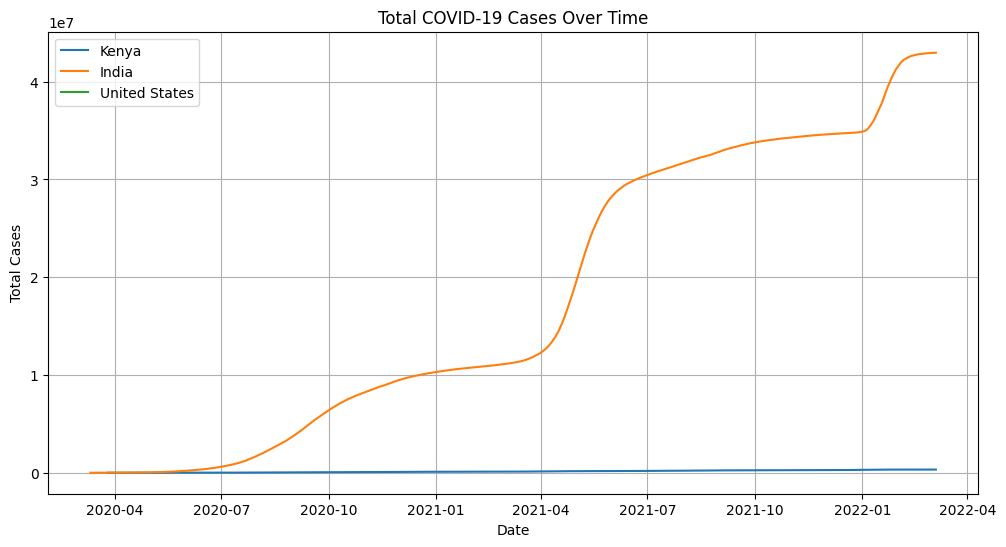

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

for country in countries:
    subset = data_countries[data_countries['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.show()


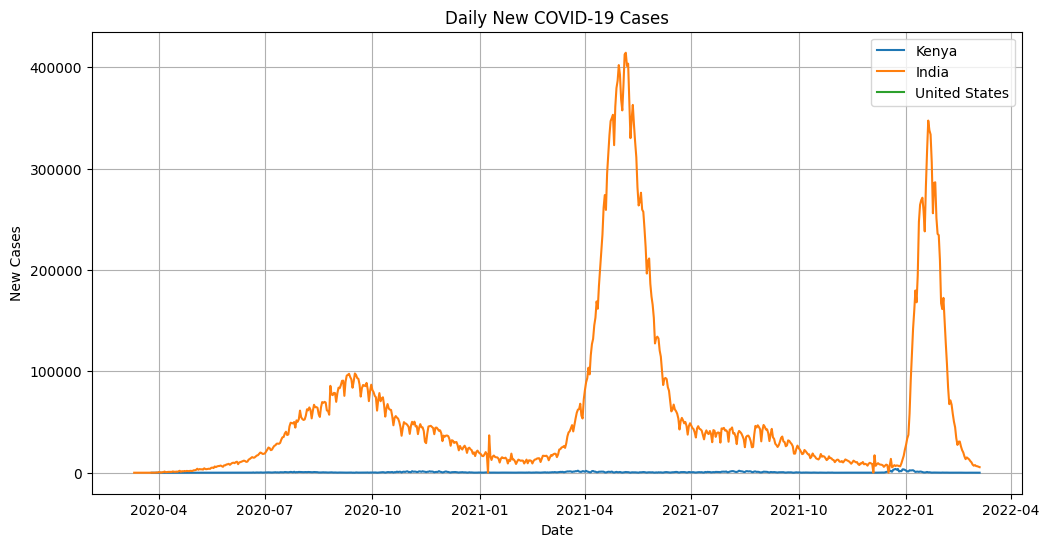

In [13]:
plt.figure(figsize=(12,6))

for country in countries:
    subset = data_countries[data_countries['location'] == country]
    plt.plot(subset['date'], subset['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-15-b3eb60b70821>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_countries['death_rate'] = data_countries['total_deaths'] / data_countries['total_cases']


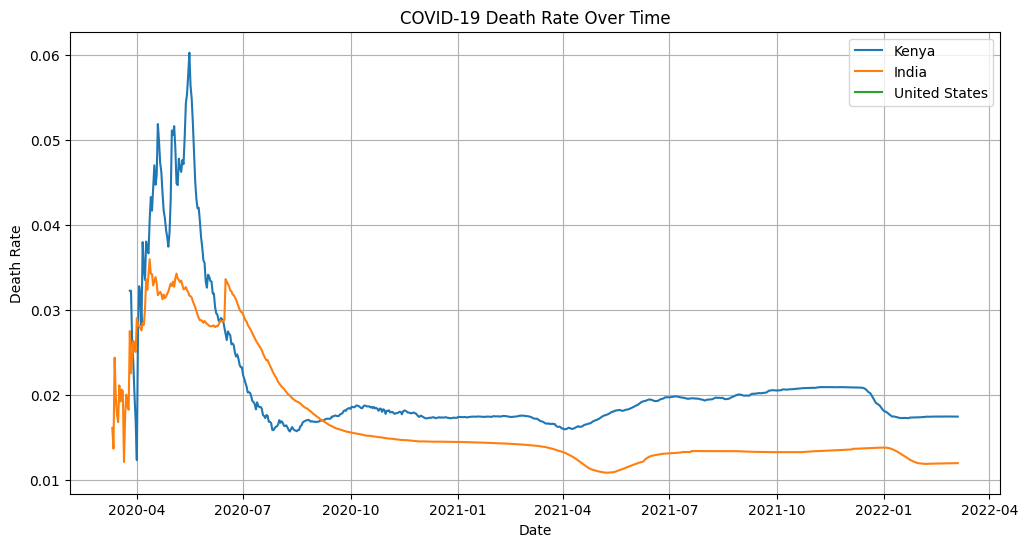

In [15]:
data_countries['death_rate'] = data_countries['total_deaths'] / data_countries['total_cases']

plt.figure(figsize=(12,6))
for country in countries:
    subset = data_countries[data_countries['location'] == country]
    plt.plot(subset['date'], subset['death_rate'], label=country)

plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.grid(True)
plt.show();


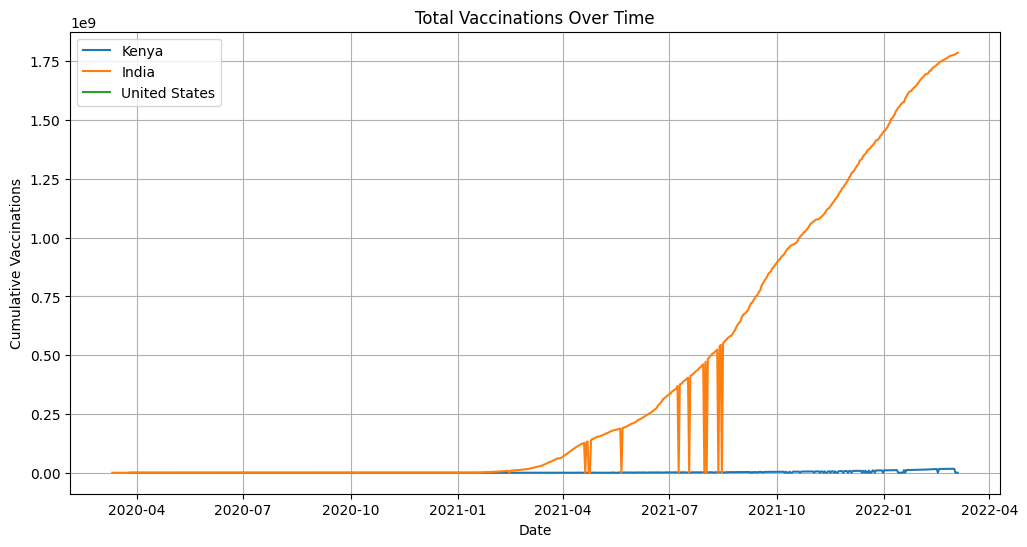

In [16]:
plt.figure(figsize=(12,6))

for country in countries:
    subset = data_countries[data_countries['location'] == country]
    plt.plot(subset['date'], subset['total_vaccinations'], label=country)

plt.title('Total Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Vaccinations')
plt.legend()
plt.grid(True)
plt.show()


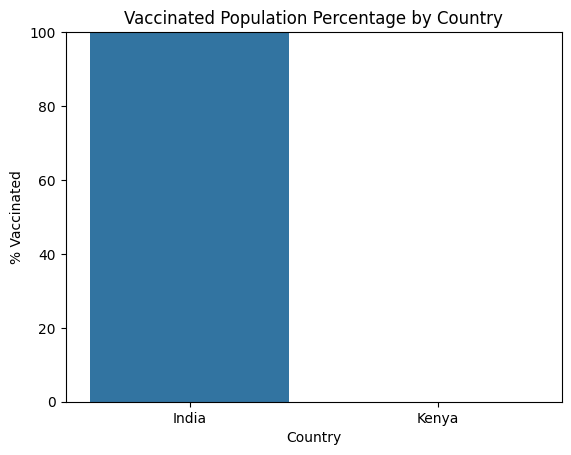

In [18]:
import seaborn as sns

sns.barplot(data=latest_data, x='location', y='vaccinated_percent')
plt.title('Vaccinated Population Percentage by Country')
plt.ylabel('% Vaccinated')
plt.xlabel('Country')
plt.ylim(0, 100)
plt.show()


In [19]:
import plotly.express as px

latest_global = data_clean.sort_values('date').groupby('location').tail(1)

fig = px.choropleth(
    latest_global,
    locations="location",
    locationmode="country names",
    color="total_cases",
    title="Global COVID-19 Total Cases",
    color_continuous_scale="Reds"
)
fig.show()


#**MY FINDINGS**
1.India experienced a sharp spike in cases around May 2021.

2.USA had the highest total cases among the selected countries.

3.Kenya’s vaccination rate is significantly lower than that of India and the USA.

4.The global death rate has generally declined over time, possibly due to improved treatments and vaccinations.